In [13]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# 读入数据
data = genfromtxt(r"Delivery.csv", delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [15]:
# 切分数据
x_data = data[:, : -1]
y_data = data[:,-1]
print(x_data)
print(y_data)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [16]:
# 学习率
learningRate = 0.0001
# 参数
w0 = 0
w1 = 0
w2 = 0

# 迭代次数
epo = 1000

# 最小二乘法

def computer_error(w0, w1, w2, x_data, y_data):

    totalerror = 0
    for i in range(0, len(x_data)):
        totalerror += (y_data[i] - (w0+w1*x_data[i, 0]+w2*x_data[i, 1]))**2
    return totalerror/float(len(x_data))


def gradient_descent_runner(x_data, y_data, w0, w1, w2, learningRate, epo):
    # 计算总数据量
    m = float(len(x_data))
    # 循环迭代总数
    for i in range(epo):
        w0_grad = 0
        w1_grad = 0
        w2_grad = 0
        # 计算梯度的总和再求平均
        for j in range(0, len(x_data)):
            w0_grad += (1/m) * \
                ((w1 * x_data[j, 0] + w2*x_data[j, 1] + w0) - y_data[j])
            w1_grad += (1/m) * x_data[j, 0] * ((w1 *x_data[j, 0] + w2*x_data[j, 1] + w0) - y_data[j])
            w2_grad += (1/m) * x_data[j, 1] * ((w1 *x_data[j, 0] + w2*x_data[j, 1] + w0) - y_data[j])
        # 更新权值和截距
        w0 = w0-(learningRate*w0_grad)
        w1 = w1-(learningRate*w1_grad)
        w2 = w2-(learningRate*w2_grad)
    return w0, w1, w2

In [17]:
print("Starting w0 = {0}, w1 = {1}, w2 = {2}, error = {3}".format(w0, w1, w2, computer_error(w0, w1, w2, x_data, y_data)))
print("Running...")
w0, w1, w2 = gradient_descent_runner(x_data, y_data, w0, w1, w2, learningRate, epo)
print("After {0} iterations w0 = {1}, w1 = {2}, w2 = {3}, error = {4}".format(epo, w0, w1, w2, computer_error(w0, w1, w2, x_data, y_data)))

Starting w0 = 0, w1 = 0, w2 = 0, error = 47.279999999999994
Running...
After 1000 iterations w0 = 0.006971416196678632, w1 = 0.08021042690771771, w2 = 0.07611036240566814, error = 0.7731271432218118


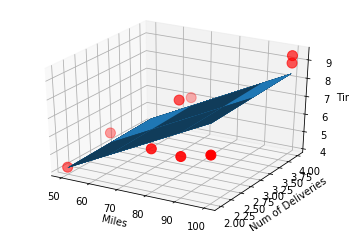

In [18]:
ax = plt.figure().add_subplot(111, projection = '3d') 
ax.scatter(x_data[:,0], x_data[:,1], y_data, c = 'r', marker = 'o', s = 100) #点为红色三角形  ，100是点的大小
x0 = x_data[:,0]
x1 = x_data[:,1]

# 生成网格矩阵
x0, x1 = np.meshgrid(x0, x1)
#print(x1)
z = w0 + x0*w1 + x1*w2
# 画3D图
ax.plot_surface(x0, x1, z)
#设置坐标轴  
ax.set_xlabel('Miles')  
ax.set_ylabel('Num of Deliveries')
ax.set_zlabel('Time')
 
#显示图像  
plt.show()  